In [2]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import math
import pandas as pd

In [3]:
digits = loadmat('./HW3data/Digits.mat')

In [4]:
train_digits = digits['Gallery']

In [5]:
test_digits = digits['Probe']

In [6]:
digits['photo_size']

array([[32, 32]], dtype=uint8)

In [7]:
train_digits.shape,test_digits.shape

((1024, 500), (1024, 10))

In [8]:
32*32

1024

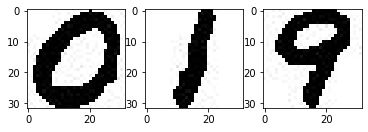

In [9]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(test_digits[:,0].reshape(32,32).T,cmap='gray')
ax[1].imshow(test_digits[:,1].reshape(32,32).T,cmap='gray')
ax[2].imshow(test_digits[:,9].reshape(32,32).T,cmap='gray')

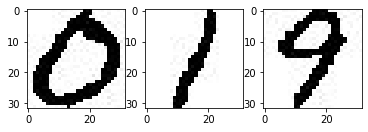

In [10]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(train_digits[:,0].reshape(32,32).T,cmap='gray')
ax[1].imshow(train_digits[:,50].reshape(32,32).T,cmap='gray')
ax[2].imshow(train_digits[:,499].reshape(32,32).T,cmap='gray')

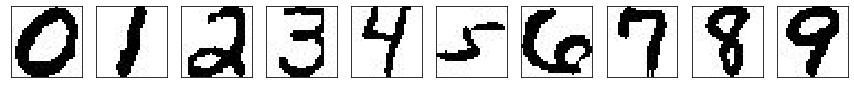

In [11]:
fig, ax = plt.subplots(1, 10,figsize=(15,15))
for i in range(10):
    ax[i].imshow(test_digits[:,i].reshape(32,32).T,cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [12]:
train_digits = train_digits - np.mean(train_digits,axis=0)

In [13]:
test_digits = test_digits - np.mean(test_digits,axis=0)

In [14]:
D=10

dict_df = {}
for j in range(10):
    x=test_digits[:,j]
    dist_dict={}
    ctr=0
    for i in range(10):
        train_digits_50=train_digits[:,ctr:ctr+50]
        U,S,V=np.linalg.svd(train_digits_50,full_matrices=False)
        xD=np.matmul(np.matmul(U[:,0:D],U[:,0:D].T),x)
        dist=np.linalg.norm(x-xD)/np.linalg.norm(x)
        dist_dict.update({i:dist})
        ctr +=50
    df=pd.DataFrame(dist_dict.items(),columns=['train_digits','distance'])
    df['test_digit']=j
    dict_df.update({j:df})

In [16]:
final=pd.concat(dict_df.values(), ignore_index=True)

In [17]:
final["dist_rank"] = final.groupby("test_digit")["distance"].rank("dense")

In [18]:
final["difference"] = final.train_digits-final.test_digit

In [19]:
final[final.dist_rank==1]

,train_digits,distance,test_digit,dist_rank,difference
0,0,0.471979,0,1.0,0
11,1,0.427667,1,1.0,0
22,2,0.698496,2,1.0,0
33,3,0.643623,3,1.0,0
44,4,0.567575,4,1.0,0
55,5,0.745625,5,1.0,0
66,6,0.851196,6,1.0,0
77,7,0.556160,7,1.0,0
89,9,0.658987,8,1.0,1
99,9,0.443821,9,1.0,0


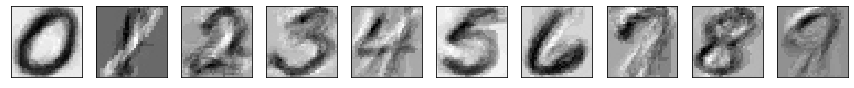

In [31]:
x=test_digits[:,0]

fig, ax = plt.subplots(1, 10,figsize=(15,15))
ctr=0
for i in range(10):
        train_digits_50=train_digits[:,ctr:ctr+50]
        U,S,V=np.linalg.svd(train_digits_50,full_matrices=False)
        xD=np.matmul(np.matmul(U[:,0:D],U[:,0:D].T),x)
        ax[i].imshow(xD.reshape(32,32).T,cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ctr +=50

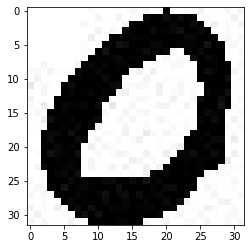

In [32]:
plt.imshow(x.reshape(32,32).T,cmap='gray')

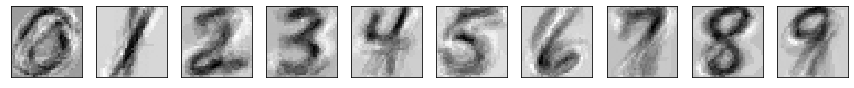

In [34]:
x=test_digits[:,8]

fig, ax = plt.subplots(1, 10,figsize=(15,15))
ctr=0
for i in range(10):
        train_digits_50=train_digits[:,ctr:ctr+50]
        U,S,V=np.linalg.svd(train_digits_50,full_matrices=False)
        xD=np.matmul(np.matmul(U[:,0:D],U[:,0:D].T),x)
        ax[i].imshow(xD.reshape(32,32).T,cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ctr +=50

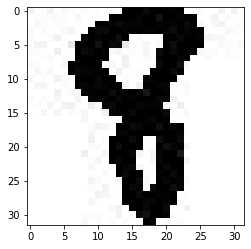

In [35]:
plt.imshow(x.reshape(32,32).T,cmap='gray')